In [32]:
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

In [33]:
X = np.array([[3.4], [1.8], [4.6], [2.3], [3.1], 
              [5.5], [0.7], [3.0], [2.6], [4.3], 
              [2.1], [1.1], [6.1], [4.8], [3.8]])

y = np.array([[26.2], [17.8], [31.3], [23.1], [27.5], 
              [36.0], [14.1], [22.3], [19.6], [31.3], 
              [24.0], [17.3], [43.2], [36.4], [26.1]])

In [34]:
cv = 5

lr= linear_model.LinearRegression()
predicted = cross_val_predict(lr, X, y, cv=cv)

lr_lasso = linear_model.Lasso()
predicted_lasso = cross_val_predict(lr_lasso, X, y, cv=cv)

lr_ridge = linear_model.Ridge()
predicted_ridge = cross_val_predict(lr_ridge, X, y, cv=cv)

lr_elastic = linear_model.ElasticNet()
predicted_elastic = cross_val_predict(lr_elastic, X, y, cv=cv)

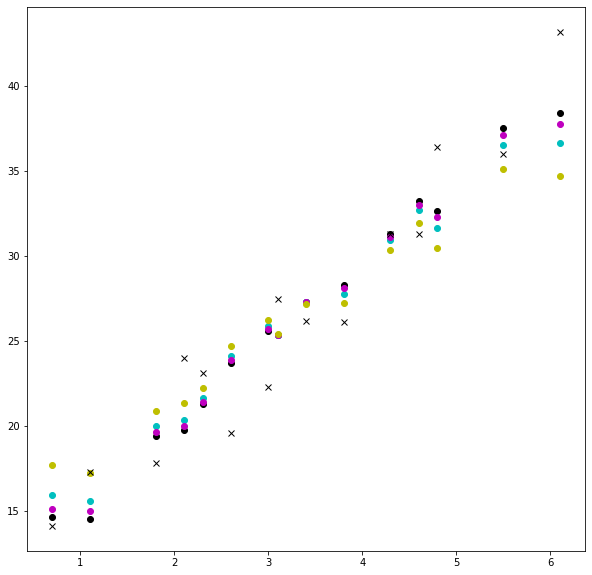

In [35]:
plt.figure(figsize=(10,10))
plt.plot(X, predicted, 'ko')
plt.plot(X, predicted_lasso, 'co')
plt.plot(X, predicted_ridge, 'mo')
plt.plot(X, predicted_elastic, 'yo')
plt.plot(X, y, 'kx')

plt.show()

In [36]:
# calculate slopes and intercepts
from scipy.stats import linregress

In [37]:
def to_list(NP):
    NP_list = []

    for i in range(len(NP)):
        NP_list.append(float(NP[i]))
    
    return NP_list

In [48]:
#slope and intercept of original data
k_y,b_y = linregress(to_list(X),to_list(y))[0], linregress(to_list(X),to_list(y))[1]

#slope and intercept of linear regression prediction
k_pred,b_pred = linregress(to_list(X),to_list(predicted))[0], linregress(to_list(X),to_list(predicted))[1]

#slope and intercept of lasso prediction
k_lasso,b_lasso = linregress(to_list(X),to_list(predicted_lasso))[0], linregress(to_list(X),to_list(predicted_lasso))[1]

#slope and intercept of ridge prediction
k_ridge,b_ridge = linregress(to_list(X),to_list(predicted_ridge))[0], linregress(to_list(X),to_list(predicted_ridge))[1]

#slope and interceptt of elastic prediction
k_elastic,b_elastic = linregress(to_list(X),to_list(predicted_elastic))[0], linregress(to_list(X),to_list(predicted_elastic))[1]

In [43]:
def slope(xx, k, b): return k*xx + b

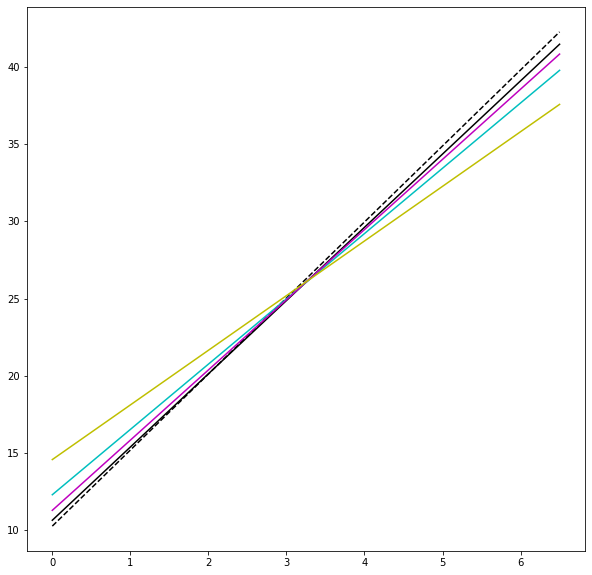

In [51]:
xx = np.linspace(0,6.5,100)
yy   = slope(xx, k_y, b_y)
yy_p = slope(xx, k_pred, b_pred)
yy_l = slope(xx, k_lasso, b_lasso)
yy_r = slope(xx, k_ridge, b_ridge)
yy_e = slope(xx, k_elastic, b_elastic)

plt.figure(figsize=(10,10))
plt.plot(xx, yy,   'k--')
plt.plot(xx, yy_p, 'k')
plt.plot(xx, yy_l, 'c')
plt.plot(xx, yy_r, 'm')
plt.plot(xx, yy_e, 'y')
plt.show()

In [53]:
# import metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [56]:
# linear regression metrics
mae_p  = mean_absolute_error(y, predicted)
mse_p  = mean_squared_error(y, predicted)
rmse_p = math.sqrt(mse_p)
r2_p   = r2_score(y, predicted)

# lasso metrics
mae_l  = mean_absolute_error(y, predicted_lasso)
mse_l  = mean_squared_error(y, predicted_lasso)
rmse_l = math.sqrt(mse_l)
r2_l   = r2_score(y, predicted_lasso)

# ridge metrics
mae_r  = mean_absolute_error(y, predicted_ridge)
mse_r  = mean_squared_error(y, predicted_ridge)
rmse_r = math.sqrt(mse_r)
r2_r   = r2_score(y, predicted_ridge)

# elastic metrics
mae_e  = mean_absolute_error(y, predicted_elastic)
mse_e  = mean_squared_error(y, predicted_elastic)
rmse_e = math.sqrt(mse_e)
r2_e   = r2_score(y, predicted_elastic)

In [76]:
print('\nLinear metrics:   MSE={0:.3f},  RMSE={1:.3f}, MAE={2:.3f}, R2= {3:.3f}'.format(mse_p, rmse_p, mae_p, r2_p))
print('Lasso metrics:    MSE={0:.3f},  RMSE={1:.3f}, MAE={2:.3f}, R2= {3:.3f}'.format(mse_l, rmse_l, mae_l, r2_l))
print('Ridge metrics:    MSE={0:.3f},  RMSE={1:.3f}, MAE={2:.3f}, R2= {3:.3f}'.format(mse_r, rmse_r, mae_r, r2_r))
print('Elastic metrics:  MSE={0:.3f}, RMSE={1:.3f}, MAE={2:.3f}, R2= {3:.3f}\n'.format(mse_e, rmse_e, mae_e, r2_e))


Linear metrics:   MSE=7.547,  RMSE=2.747, MAE=2.389, R2= 0.876
Lasso metrics:    MSE=9.072,  RMSE=3.012, MAE=2.498, R2= 0.851
Ridge metrics:    MSE=7.896,  RMSE=2.810, MAE=2.421, R2= 0.870
Elastic metrics:  MSE=12.529, RMSE=3.540, MAE=2.699, R2= 0.794

